In [33]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import seaborn as sns
import pandas as pd
import torch
from   timm.models import efficientnet_b0
from   peff_b0 import PEffN_b0SeparateHP_V1

# Source dir/network

In [44]:
checkpoints_dir = '/mnt/smb/locker/abbott-locker/hcnn_vision/checkpoints/'
source_net = 'pnet'
source_epoch = 49
dest_net = 'random'

# Iterate through pcoders and randomly sample weights/biases

In [45]:
n_pcoders = 8

In [58]:
[k for k in source_pth['pcoderweights'].keys() if 'weight' in k][0]

'pmodule.0.weight'

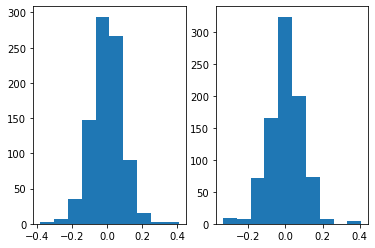

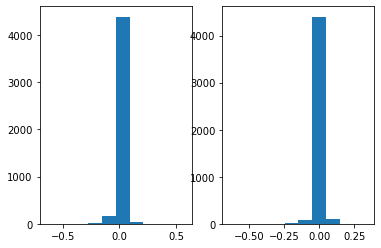

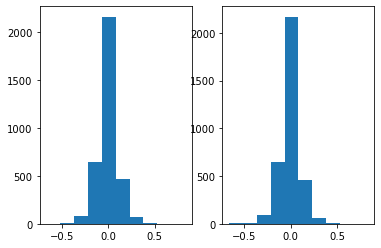

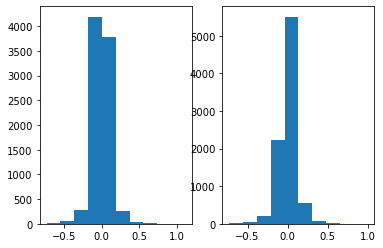

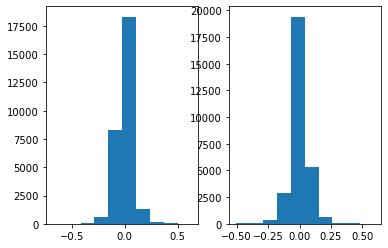

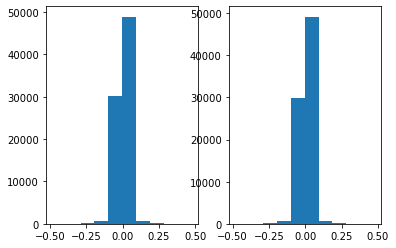

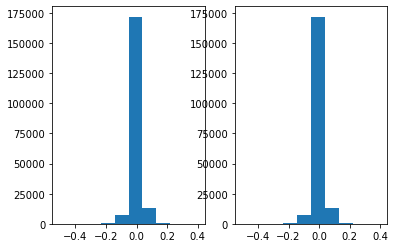

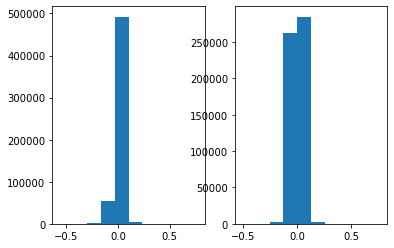

In [61]:
for n in np.arange(1, n_pcoders+1):
    source_net_dir = f'{checkpoints_dir}{source_net}/'
    dest_net_dir = f'{checkpoints_dir}{dest_net}/'
    os.makedirs(dest_net_dir, exist_ok=True)
    source_pth_file = f'{source_net_dir}pnet_pretrained_pc{n}_{source_epoch:03d}.pth'
    dest_pth_file = f'{dest_net_dir}pnet_pretrained_pc{n}_{source_epoch:03d}.pth'
    source_pth = torch.load(source_pth_file)
    weight_string = [k for k in source_pth['pcoderweights'].keys() if 'weight' in k][0]
    bias_string = [k for k in source_pth['pcoderweights'].keys() if 'bias' in k][0]
    dest_pth = {
        'pcoderweights': None,
        'optimizer'    : source_pth['optimizer'],
        'epoch'        : source_pth['epoch'],
        }
    dest_pcoderweights = deepcopy(source_pth['pcoderweights'])
    source_weight_distrib = source_pth['pcoderweights'][weight_string]
    source_weight_distrib = source_weight_distrib.cpu().numpy().flatten()
    source_bias_distrib = source_pth['pcoderweights'][bias_string].cpu().numpy().flatten()
    dest_pcoderweights[weight_string] = torch.tensor(np.random.choice(
        source_weight_distrib,
        size=source_pth['pcoderweights'][weight_string].shape))
    dest_pcoderweights[bias_string] = torch.tensor(np.random.choice(
        source_bias_distrib,
        size=source_pth['pcoderweights'][bias_string].shape))
    dest_weight_distrib = dest_pcoderweights[weight_string].cpu().numpy().flatten()
    dest_pth['pcoderweights'] = dest_pcoderweights
    
    fig, axs = plt.subplots(1,2)
    axs[0].hist(source_weight_distrib)
    axs[1].hist(dest_weight_distrib)
    plt.show()
    torch.save(dest_pth, dest_pth_file)

In [62]:
os.listdir(dest_net_dir)

['pnet_pretrained_pc4_049.pth',
 'pnet_pretrained_pc5_049.pth',
 'pnet_pretrained_pc7_049.pth',
 'pnet_pretrained_pc8_049.pth',
 'pnet_pretrained_pc6_049.pth',
 'pnet_pretrained_pc2_049.pth',
 'pnet_pretrained_pc3_049.pth',
 'pnet_pretrained_pc1_049.pth']